# Análisis de redes con igraph - R

## Cargar paquetes

In [4]:
library(igraph)

## Leer redes

### graphml

In [5]:
g <- igraph::read_graph(file = "data/ZacharyKarateNetwork.graphml", format = "graphml")

In [6]:
g

IGRAPH a5b439a U--- 34 78 -- Zachary
+ attr: name (g/c), id (v/c)
+ edges from a5b439a:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3--28  3--29  3--33  3--10
[31]  3-- 9  3--14  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--33
[61] 24--34 24--30 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

### edge list

In [9]:
g2 <- igraph::read_graph(file = "data/ZacharyKarateNetwork_edgelist.txt", 
                         format = "edgelist", 
                         directed = F)

In [10]:
g2

IGRAPH 9892b46 U--- 34 78 -- 
+ edges from 9892b46:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3-- 9  3--10  3--14  3--28
[31]  3--29  3--33  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--30
[61] 24--33 24--34 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

### ¿Es el mismo grafo? 

In [12]:
igraph::is_isomorphic_to(graph1 = g, graph2 = g2)

[1] TRUE

### los objetos no son idénticos porque g tiene diferentes atributos de nodo

In [17]:
igraph::identical_graphs(g, g2)


[1] FALSE

### Vamos a probar otra estrategia, leyendo el edge list

In [16]:
df <- read.table(file = "data/ZacharyKarateNetwork_edgelist.txt")
print(head(df))

  V1 V2
1  0  1
2  0  2
3  0  3
4  0  4
5  0  5
6  0  6


In [15]:
g3 <- graph_from_data_frame(d = df, directed = F)
g3

IGRAPH e221d66 UN-- 34 78 -- 
+ attr: name (v/c)
+ edges from e221d66 (vertex names):
 [1] 0 --1  0 --2  0 --3  0 --4  0 --5  0 --6  0 --7  0 --8  0 --10 0 --11
[11] 0 --12 0 --13 0 --17 0 --19 0 --21 0 --31 1 --2  1 --3  1 --7  1 --13
[21] 1 --17 1 --19 1 --21 1 --30 2 --3  2 --7  2 --8  2 --9  2 --13 2 --27
[31] 2 --28 2 --32 3 --7  3 --12 3 --13 4 --6  4 --10 5 --6  5 --10 5 --16
[41] 6 --16 8 --30 8 --32 8 --33 9 --33 13--33 14--32 14--33 15--32 15--33
[51] 18--32 18--33 19--33 20--32 20--33 22--32 22--33 23--25 23--27 23--29
[61] 23--32 23--33 24--25 24--27 24--31 25--31 26--29 26--33 27--33 28--31
[71] 28--33 29--32 29--33 30--32 30--33 31--32 31--33 32--33

### A lo mejor queremos trabajar con las matrices de adyacencia o peso...

In [20]:
mat <- get.adjacency(graph = g, sparse = F)
mat[1:5, 1:5]

0,1,1,1,1
1,0,1,1,0
1,1,0,1,0
1,1,1,0,0
1,0,0,0,0


In [25]:
g4 <- graph_from_adjacency_matrix(adjmatrix = mat, 
                                  mode = "undirected")
g4

IGRAPH b6b65ca U--- 34 78 -- 
+ edges from b6b65ca:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3-- 9  3--10  3--14  3--28
[31]  3--29  3--33  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--30
[61] 24--33 24--34 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

## Escribir redes

In [26]:
write.graph(graph = g, file = "ejemplo_escribir.graphml", format = "graphml")

# Analizar redes 

## Una viz nada más para tener una idea

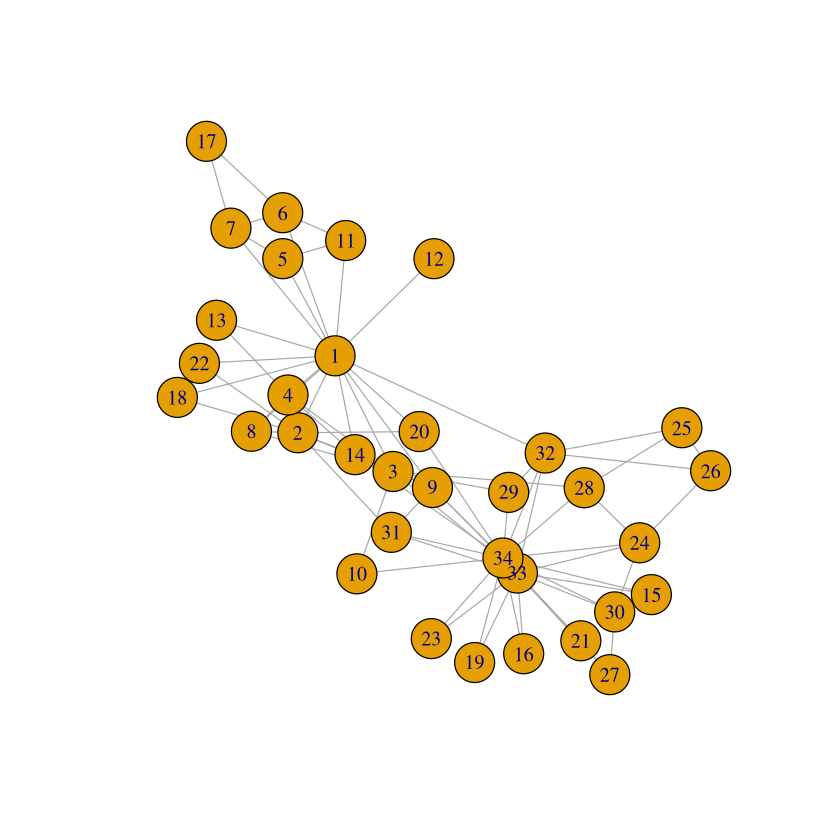

In [34]:
set.seed(725)
plot(g)

### Medidas de caminos 

In [35]:
matriz_de_caminos <- shortest.paths(g)
matriz_de_caminos[1:5, 1:5]

0,1,1,1,1
1,0,1,1,2
1,1,0,1,2
1,1,1,0,2
1,2,2,2,0


In [38]:
avg_shortest_path <- average.path.length(g)
avg_shortest_path


[1] 2.4082

In [39]:
my_diameter <- diameter(g)
my_diameter

[1] 5

### Componentes conectados

In [41]:
components_g <- components(g)

In [42]:
components_g$membership

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [43]:
components_g$csize

[1] 34

In [44]:
components_g$no

[1] 1

### Centralidades

In [45]:
V(g) #accedemos a los nodos

+ 34/34 vertices, from a5b439a:
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34

### Grado

In [48]:
g <- set.vertex.attribute(graph = g, name = "degree", value = degree(g))
#o
V(g)$degree_alt <- degree(g)

In [49]:
head(get.data.frame(g, what = "vertices"))

,id,degree,degree_alt
,<chr>,<dbl>,<dbl>
1,n0,16,16
2,n1,9,9
3,n2,10,10
4,n3,6,6
5,n4,3,3
6,n5,4,4


### Intermediación

In [50]:
V(g)$betweenness_centrality <- betweenness(g)

In [51]:
head(get.data.frame(g, what = "vertices"))

,id,degree,degree_alt,betweenness_centrality
,<chr>,<dbl>,<dbl>,<dbl>
1,n0,16,16,231.0714286
2,n1,9,9,28.4785714
3,n2,10,10,75.8507937
4,n3,6,6,6.2880952
5,n4,3,3,0.3333333
6,n5,4,4,15.8333333


In [52]:
E(g)$edge_betweenness <- edge.betweenness(g)
head(get.data.frame(g, what = "edges"))

,from,to,edge_betweenness
,<dbl>,<dbl>,<dbl>
1,1,2,14.16667
2,1,3,43.63889
3,1,4,11.50000
4,1,5,29.33333
5,1,6,43.83333
6,1,7,43.83333


### Coeficiente de agrupamiento / Transitividad

In [53]:
V(g)$cc   <- transitivity(graph = g, type = "local", isolates = "zero")
cc_global <- transitivity(graph = g, type = "global")
head(get.data.frame(g, what = "vertices"))

,id,degree,degree_alt,betweenness_centrality,cc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,n0,16,16,231.0714286,0.1500000
2,n1,9,9,28.4785714,0.3333333
3,n2,10,10,75.8507937,0.2444444
4,n3,6,6,6.2880952,0.6666667
5,n4,3,3,0.3333333,0.6666667
6,n5,4,4,15.8333333,0.5000000
